In [1]:
# set some ipython notebook properties
%matplotlib inline

# set degree of verbosity (adapt to INFO for more verbose output)
import logging
logging.basicConfig(level=logging.WARNING)

# set figure sizes
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# set display width for pandas data frames
import pandas as pd
pd.set_option('display.width', 1000)

In [6]:
# import the algorithm
from fastlmm.association import single_snp
from pysnptools.snpreader import Pheno

# set up data
##############################
bed_fn = "./data/plink_files/atchely_imputed_thinned.bed"
pheno = "./data/fastlmm/fastlmm_pheno.txt"
cov_fn = "./data/fastlmm/fastlmm_cov.txt"

# run gwas
###################################################################
results_df = single_snp( bed_fn, pheno=pheno, covar = cov_fn, count_A1=True)

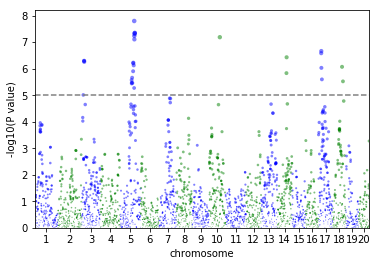

lambda=2.0351


,sid_index,SNP,Chr,GenDist,ChrPos,PValue,SnpWeight,SnpWeightSE,SnpFractVarExpl,Mixing,Nullh2
0,168,AX-168402685,5,0,122117180,1.595729e-08,-0.562675,0.099165,0.125530,0.0,0.240913
1,174,AX-168384185,5,0,125381228,4.519056e-08,-0.552896,0.100703,0.121524,0.0,0.240913
2,175,AX-168408061,5,0,125994131,4.519056e-08,-0.552896,0.100703,0.121524,0.0,0.240913
3,173,AX-168408931,5,0,124901784,4.964021e-08,-0.551142,0.100693,0.121157,0.0,0.240913
4,169,AX-168380597,5,0,122692405,5.851123e-08,-0.541298,0.099433,0.120510,0.0,0.240913
5,128,AX-168403658,10,0,98142348,6.509680e-08,0.544155,0.100313,0.120089,0.0,0.240452
6,170,AX-168391783,5,0,123243870,7.863634e-08,-0.543358,0.100804,0.119340,0.0,0.240913
7,33,AX-168392378,17,0,25967379,2.163195e-07,-0.516381,0.099251,0.115246,0.0,0.248269
8,32,AX-168412541,17,0,25397397,2.609939e-07,-0.512725,0.099225,0.114471,0.0,0.248269
9,113,AX-168415797,14,0,88336162,3.725987e-07,-0.506408,0.099306,0.112987,0.0,0.249278


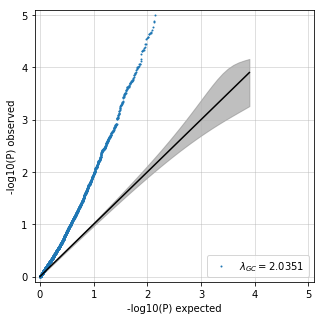

In [7]:
# manhattan plot
import pylab
import fastlmm.util.util as flutil
flutil.manhattan_plot(results_df.as_matrix(["Chr", "ChrPos", "PValue"]),pvalue_line=1e-5,xaxis_unit_bp=False)
pylab.show()

# qq plot
from fastlmm.util.stats import plotp
plotp.qqplot(results_df["PValue"].values, xlim=[0,5], ylim=[0,5])

# print head of results data frame
import pandas as pd
pd.set_option('display.width', 2000)
results_df.head(n=10)

In [13]:
# example for two kernel feature selection
# this takes a couple of minutes to run on a 20-proc machine.
from pysnptools.snpreader import Bed
from fastlmm.association import single_snp_all_plus_select

from fastlmm.util.runner import LocalMultiProc
runner = LocalMultiProc(20,mkl_num_threads=5)
    
# define file names
snp_reader = Bed("./data/plink_files/atchely_imputed_thinned", count_A1=True)
pheno = Pheno("./data/fastlmm/fastlmm_pheno.txt")
cov_fn = "./data/fastlmm/fastlmm_cov.txt"


# find the chr5 SNPs
test_snps = snp_reader[:,snp_reader.pos[:,0] == 5]

In [15]:
#select the 2nd kernel and run GWAS
results_df = single_snp_all_plus_select(test_snps=test_snps,G=snp_reader,
                                        pheno=pheno,GB_goal=2,do_plot=True,runner=runner)

import fastlmm.util.util as flutil
flutil.manhattan_plot(results_df.as_matrix(["Chr", "ChrPos", "PValue"]),pvalue_line=1e-5,xaxis_unit_bp=False)
pylab.show()

results_df.head()

KeyboardInterrupt: 